##ANN for image Classification

1. Load in the data
2. Build the model
3. Train the model
4. Evaluate the model
5. Make predictions


In [ ]:
import tensorflow as tf
from keras.datasets import mnist

In [ ]:
#load the model
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X= train_X / 255
test_X = test_X / 255

In [ ]:
train_X.shape

(60000, 28, 28)

In [ ]:
train_y.shape

(60000,)

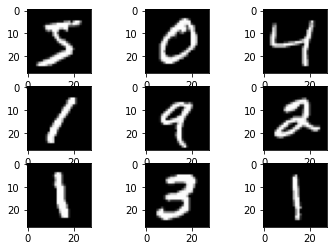

In [ ]:
from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [ ]:
#instantiate the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
#compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

#train the model 
r = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0392 - accuracy: 0.9872 - val_loss: 0.0685 - val_accuracy: 0.9807
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0350 - accuracy: 0.9881 - val_loss: 0.0753 - val_accuracy: 0.9799
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0337 - accuracy: 0.9884 - val_loss: 0.0735 - val_accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0318 - accuracy: 0.9890 - val_loss: 0.0786 - val_accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0301 - accuracy: 0.9899 - val_loss: 0.0724 - val_accuracy: 0.9818
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0292 - accuracy: 0.9901 - val_loss: 0.0871 - val_accuracy: 0.9797
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0277 - accuracy: 0.9902 - val_loss: 0.0728 - val_accuracy:

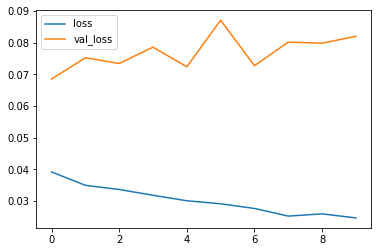

In [ ]:
#Plot loss per iteration
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label= 'val_loss')
plt.legend()

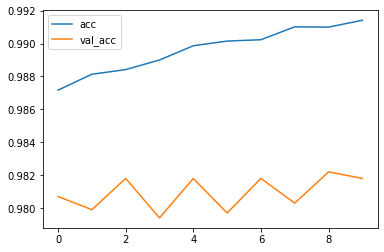

In [ ]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label= 'val_acc')
plt.legend()

In [ ]:
#evaluate the model 
model.evaluate(train_X, train_y)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0060 - accuracy: 0.9981


[0.006031326949596405, 0.998116672039032]

In [ ]:
#predict the model 
import numpy as np

y_pred = model.predict(test_X)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


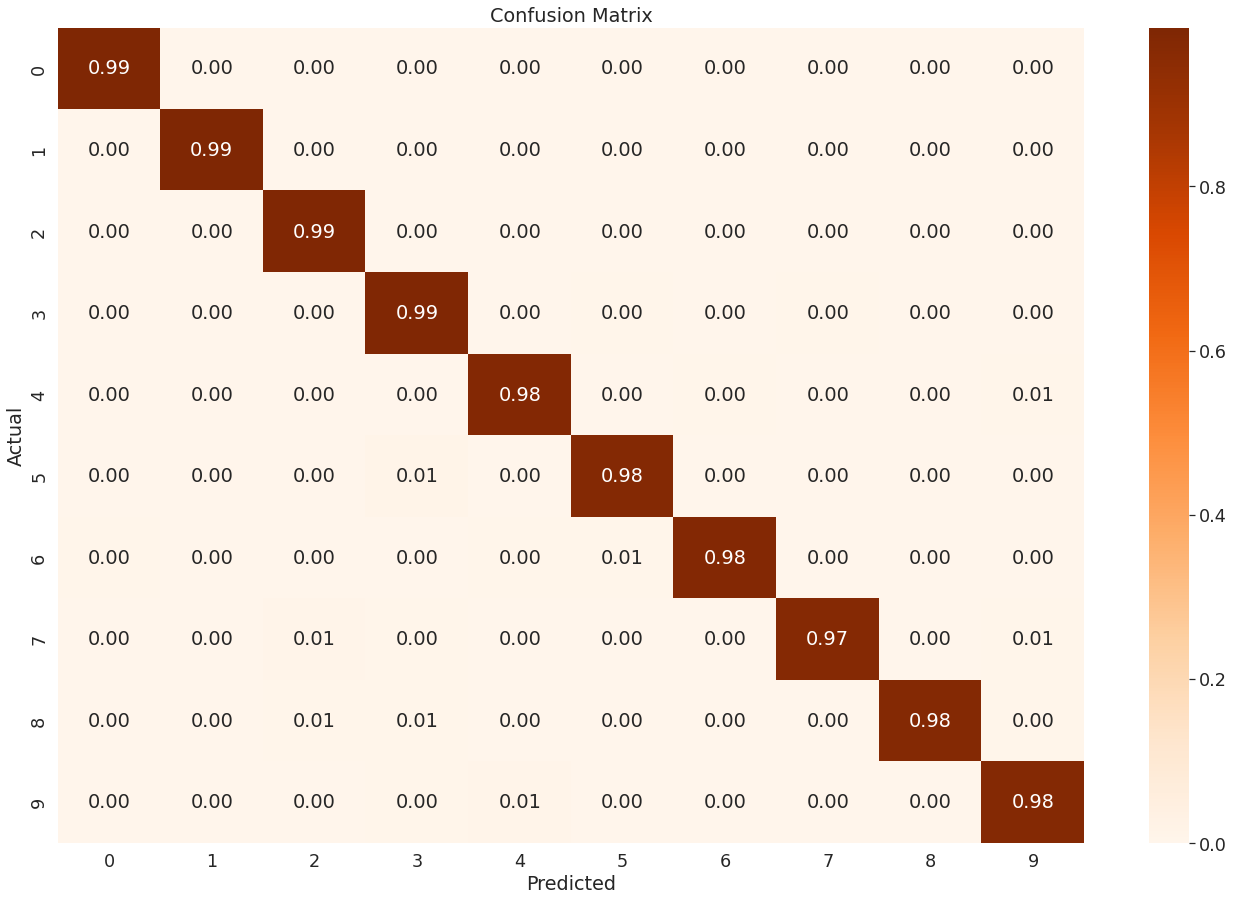

In [ ]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


conf_mat = confusion_matrix(test_y, y_pred, normalize='all')
cmn = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(23,15))
sns.heatmap(cmn, annot=True, fmt='.2f',  cmap="Oranges")
sns.set(font_scale=1.6) # for label size
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show(block=False)

Text(0.5, 1.0, 'True label: 3  Predicted: 8')

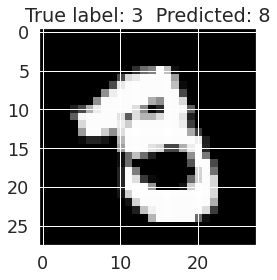

In [ ]:
#Show some misclassified examples

missclassified_idx = np.where(y_pred != test_y)[0]
i = np.random.choice(missclassified_idx)
plt.imshow(test_X[i], cmap='gray')
plt.title('True label: %s  Predicted: %s' % (test_y[i], y_pred[i]))